# Imports

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',100)

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns

In [134]:
import statsmodels.api as sm

In [2]:
df_raw = pd.read_csv('train.csv')

In [3]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Notes:
- Year Sold and Built not useful by itself, need to be changed into Age at Sale
- Year Sold minus Year Remodel gives time since last remodel
- MSSubClass will need some encoding (one-hot)
- MSZoning will need encoding
- Street can be one hot encoded
- Alley will be encoded
- LotShape encoded
- LandContour encoded
- Utilities encode

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some variables have lots of nulls, and coul be dropped:
- PoolQC
- MiscFeature
- Alley

These vars will need to see if nulls are meaningful:
- 

## Target var analysis

In [30]:
df_raw['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

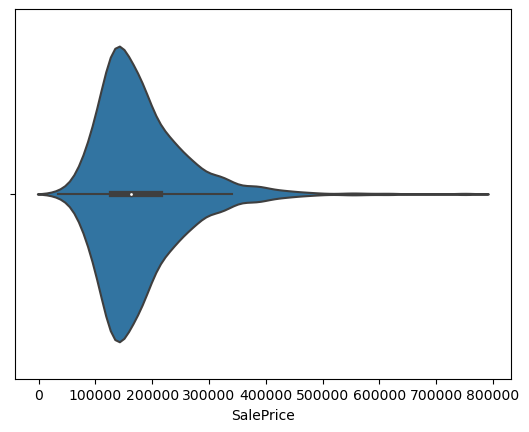

In [35]:
sns.violinplot(x=df_raw['SalePrice'])

## Loop through categorical variables and look at average house price
First use everything that's an object.
Numerical variables that are actually categorical are:
- MSSubClass
- YearBuilt      
- YearRemodAdd   
- YrSold         
- MoSold         
- GarageYrBlt

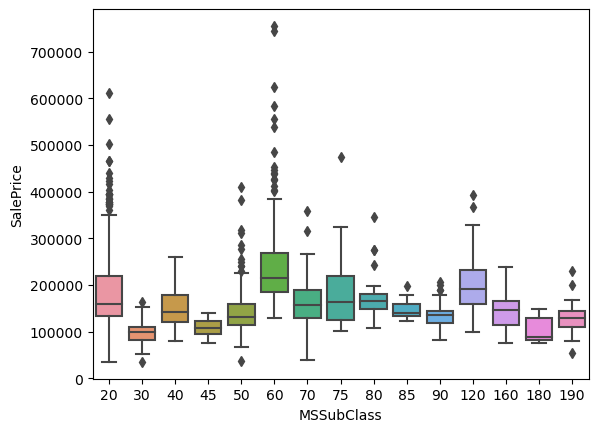

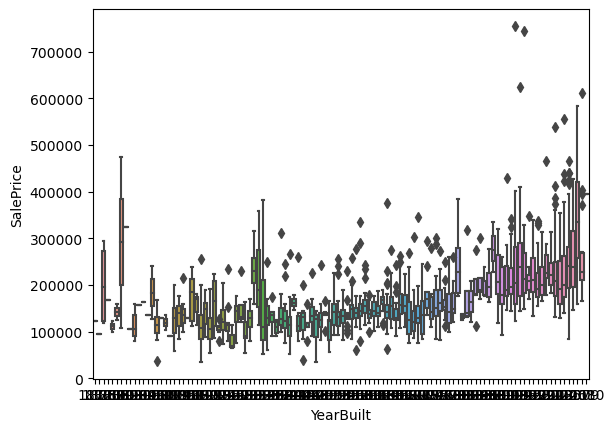

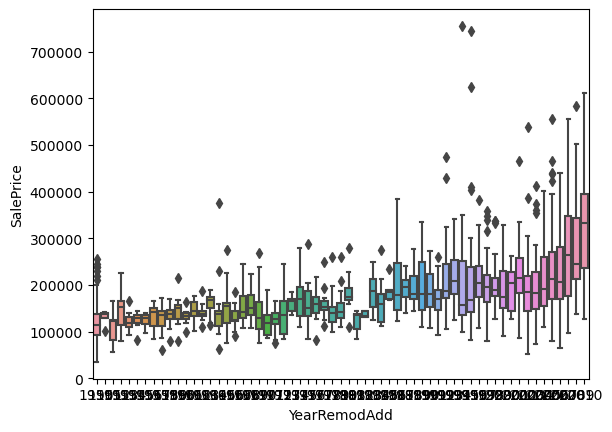

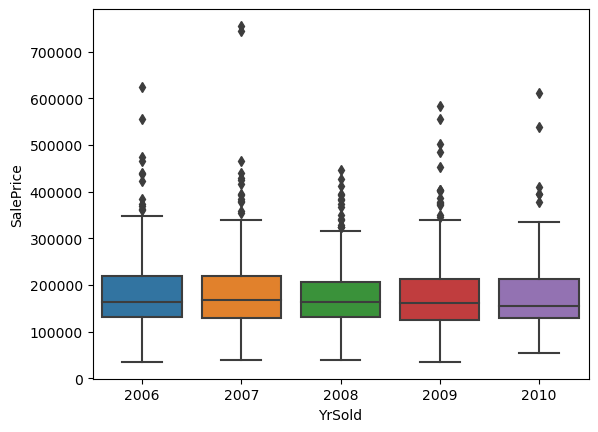

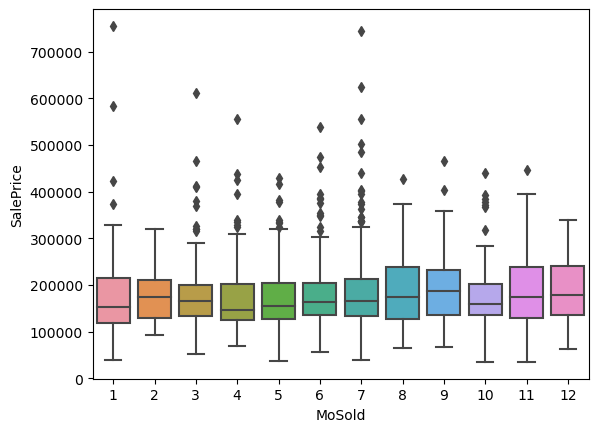

In [36]:
for var in [
 'MSSubClass'
 ,'YearBuilt'
 ,'YearRemodAdd'   
 ,'YrSold'         
 ,'MoSold'
,'GarageYrBlt']:
    # df_raw.groupby(var,dropna=False).agg({'SalePrice':'mean'}).plot.bar()
    sns.boxplot(data=df_raw,x=var,y='SalePrice')
    plt.show()

In [ ]:
sns.boxplot

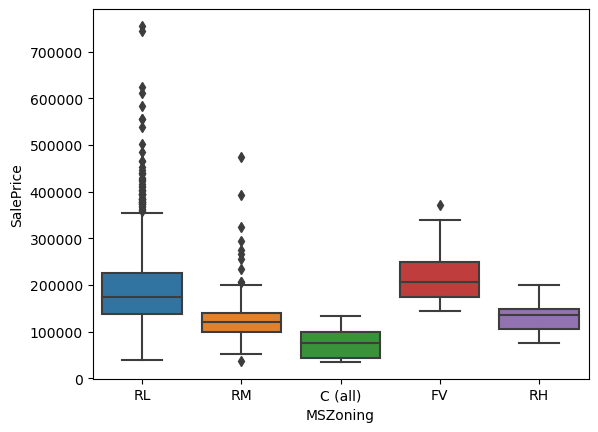

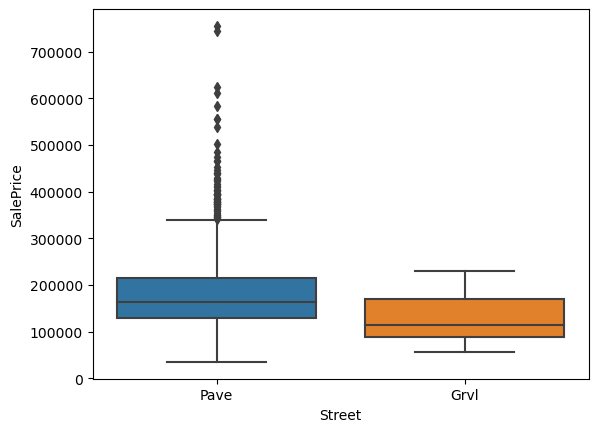

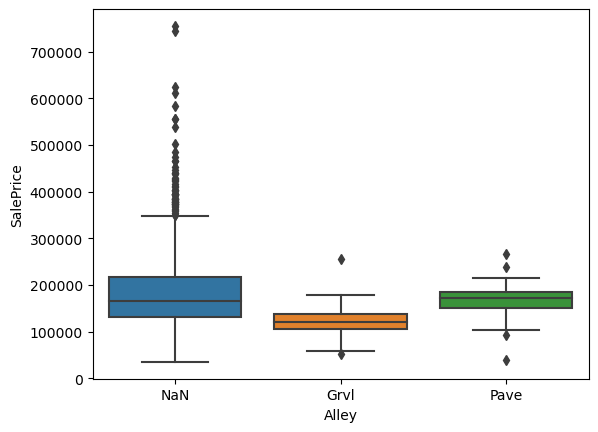

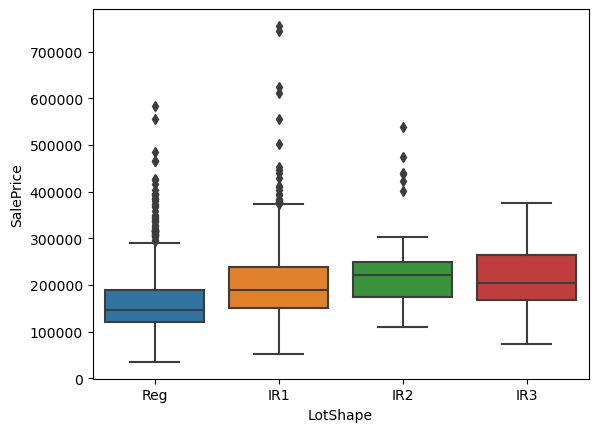

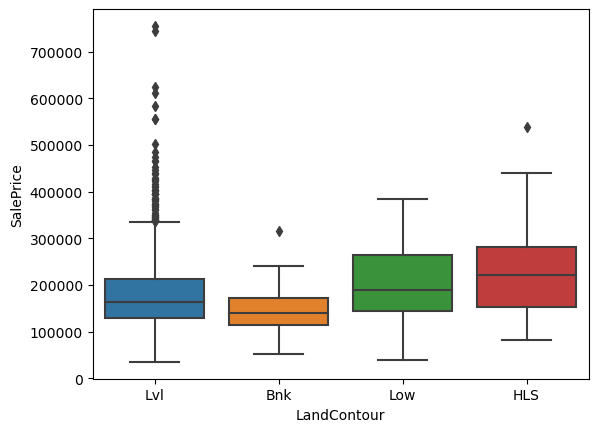

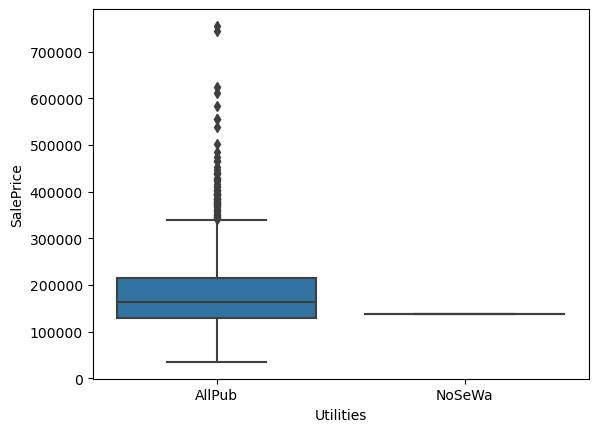

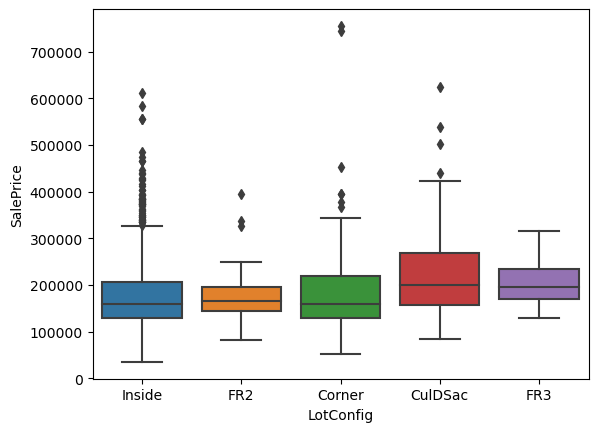

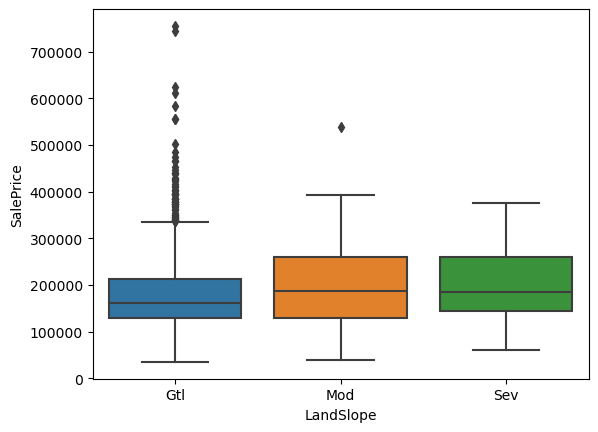

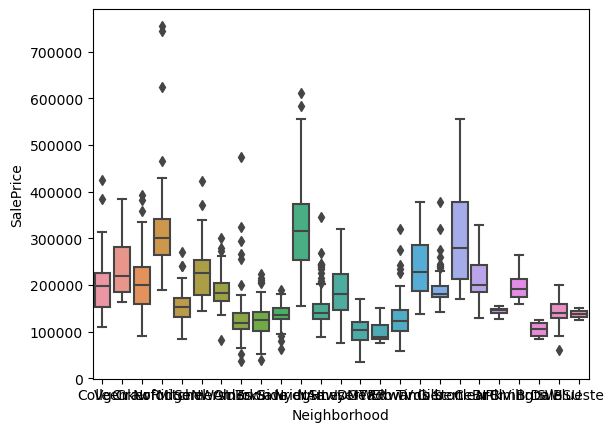

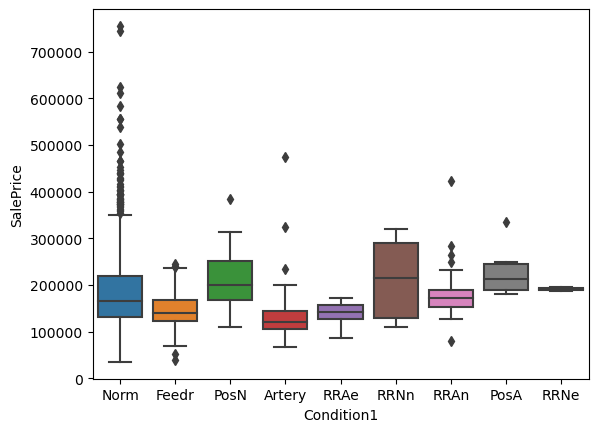

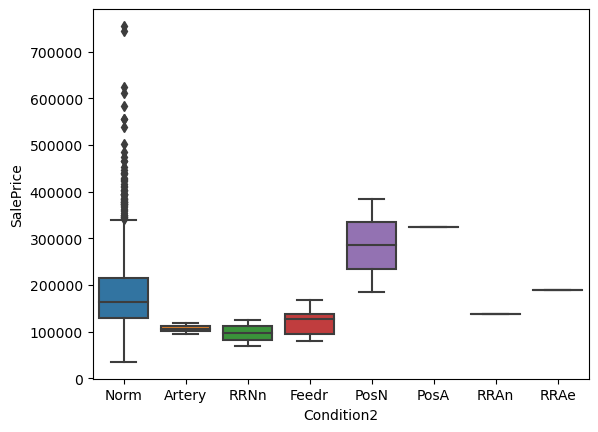

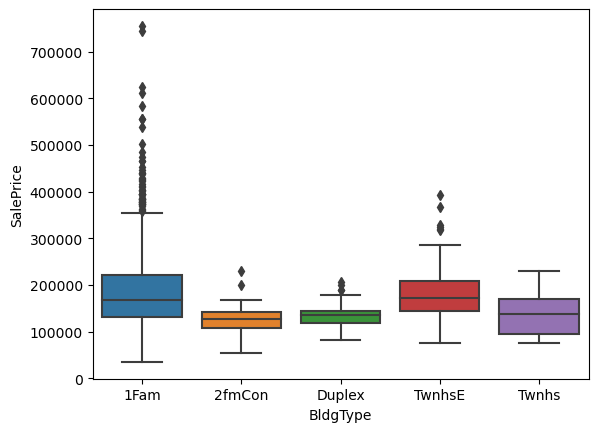

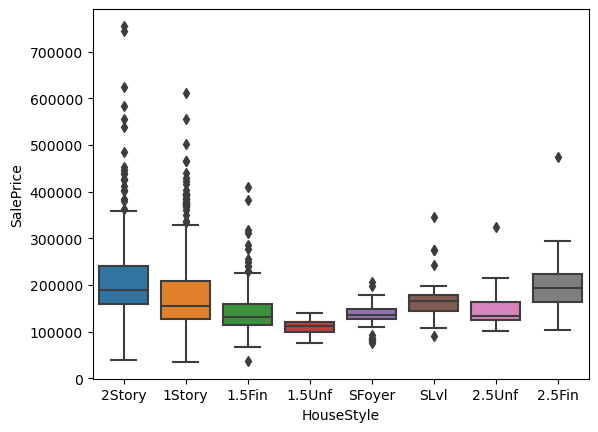

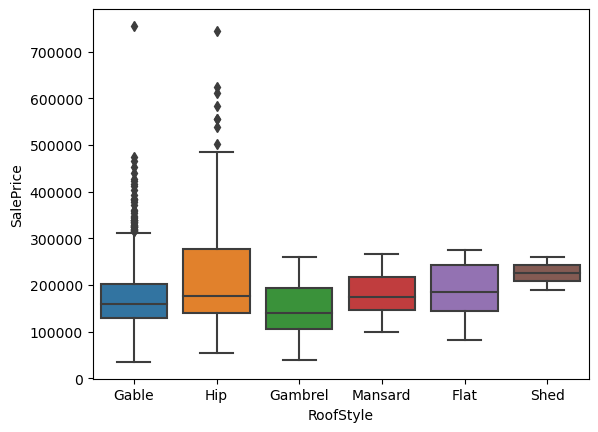

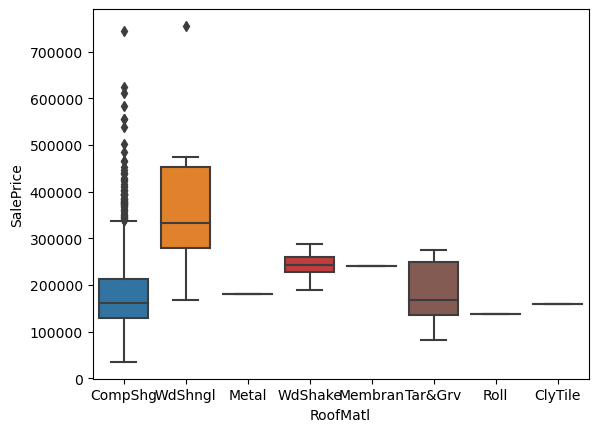

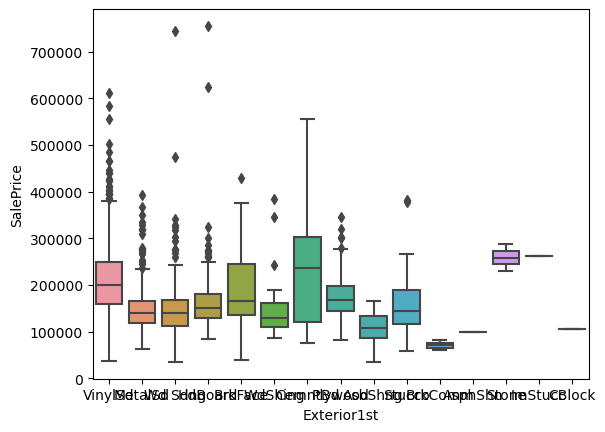

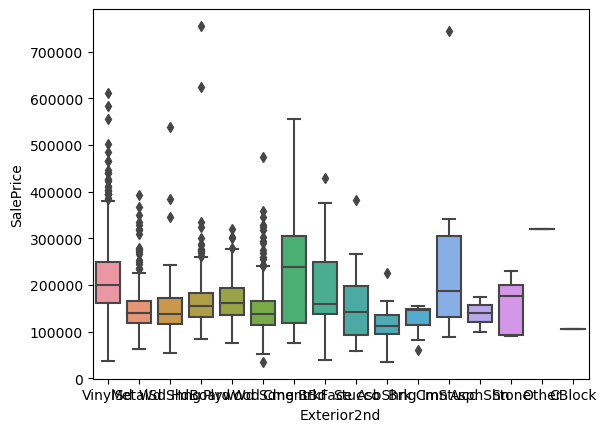

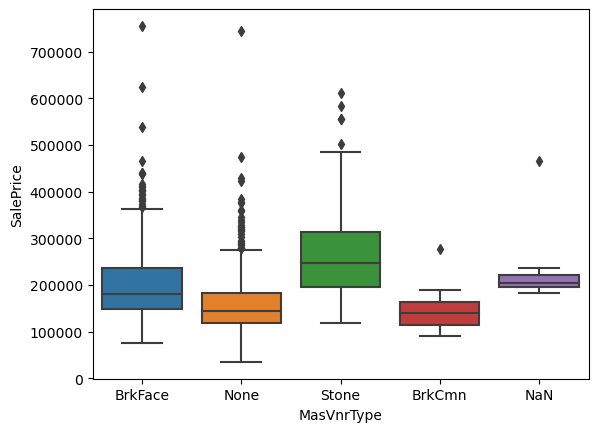

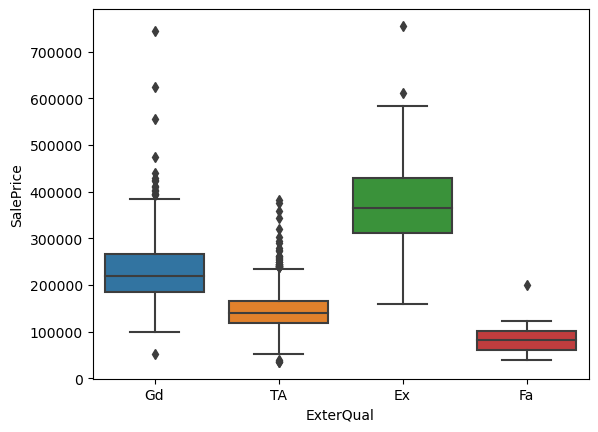

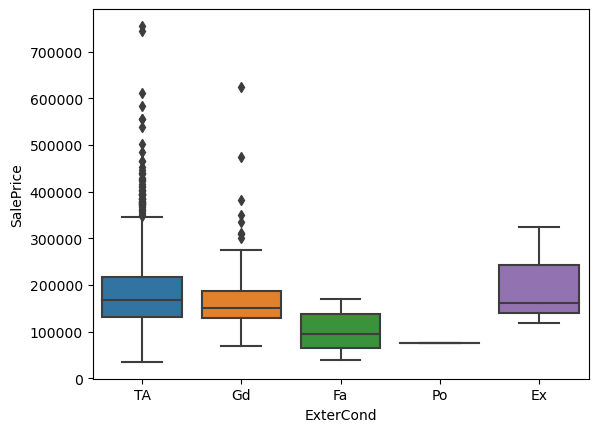

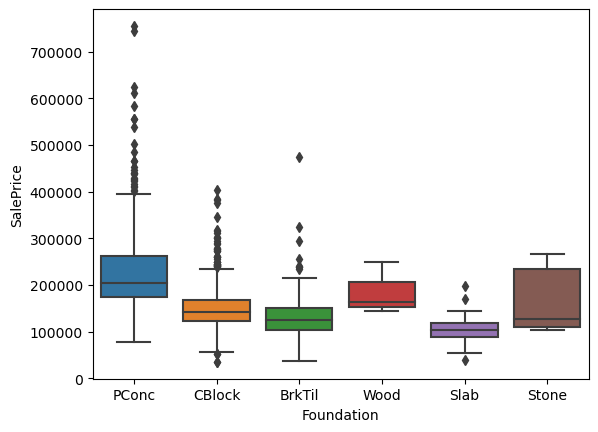

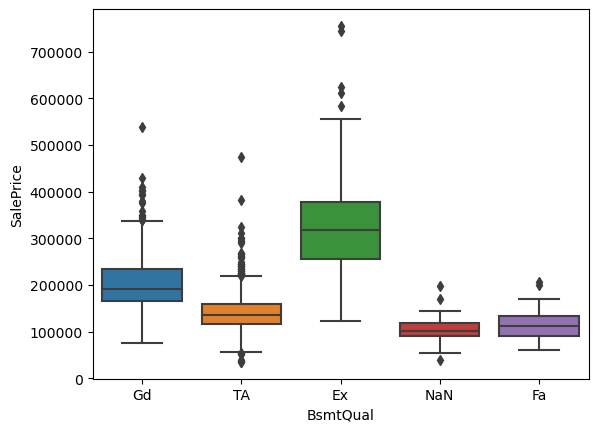

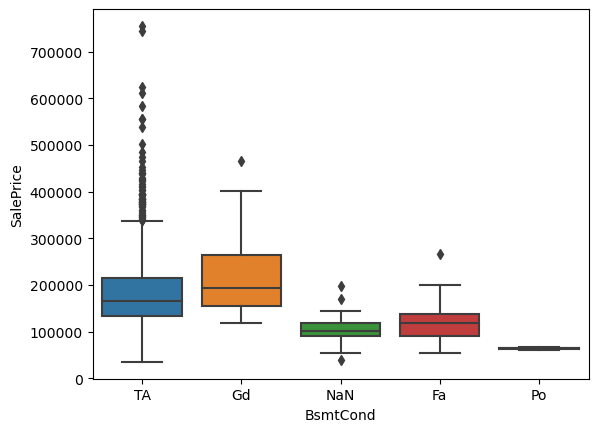

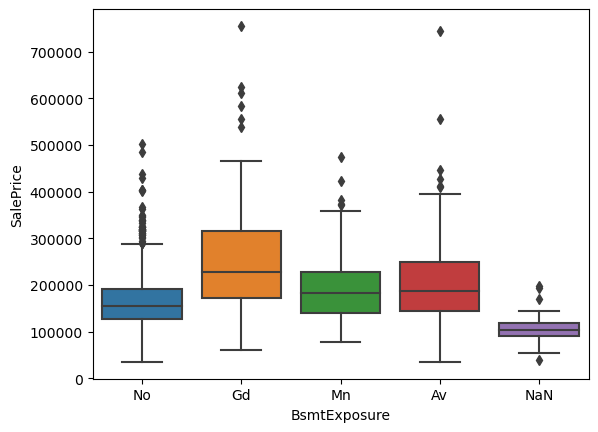

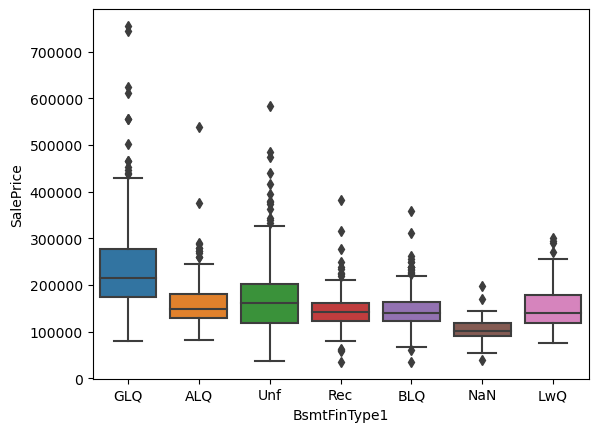

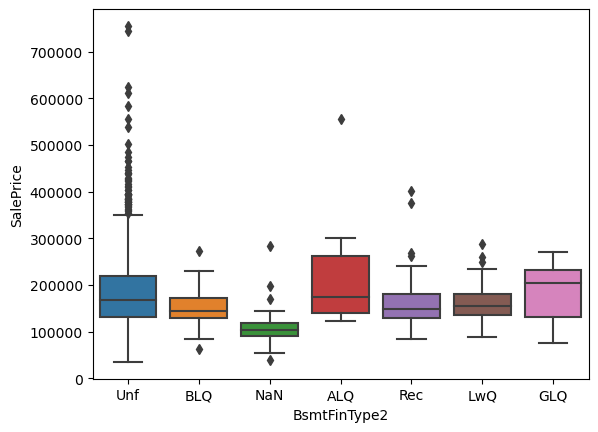

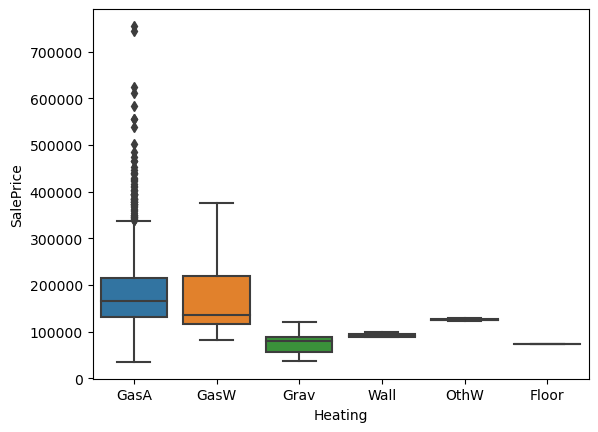

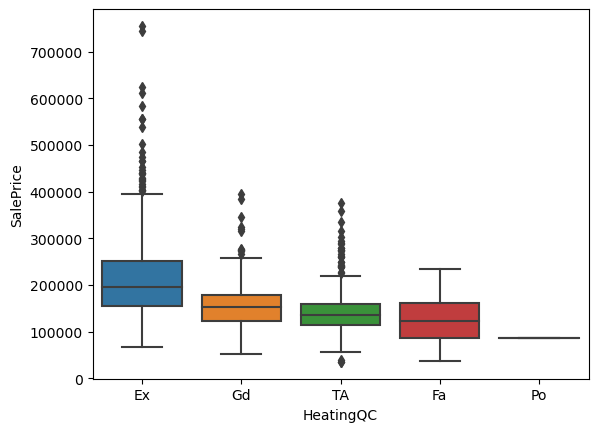

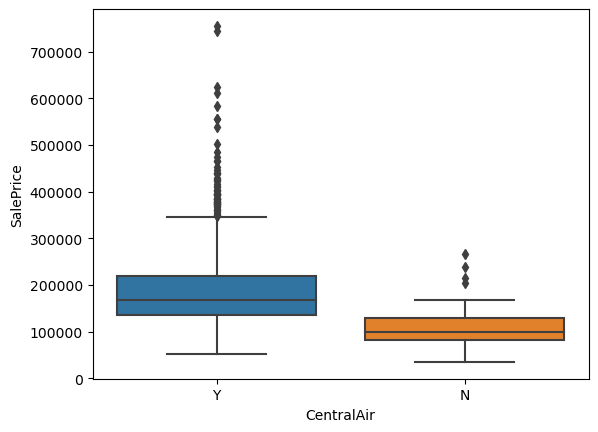

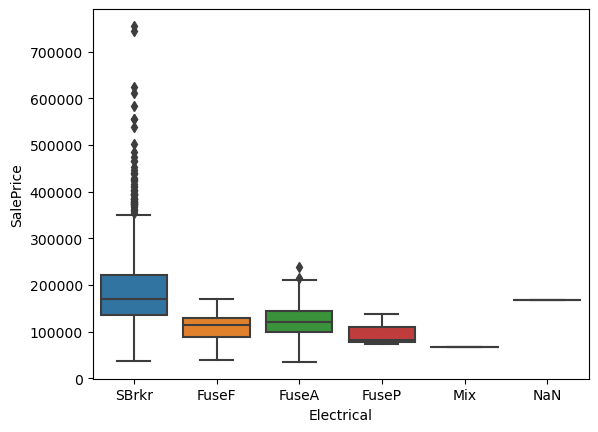

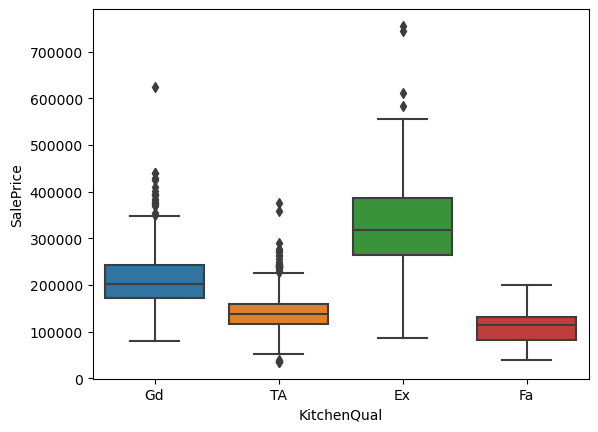

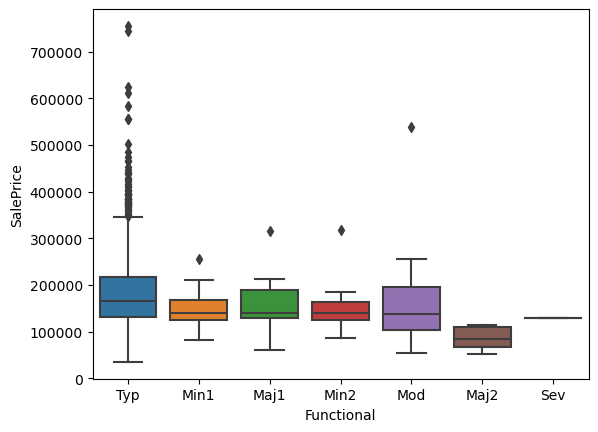

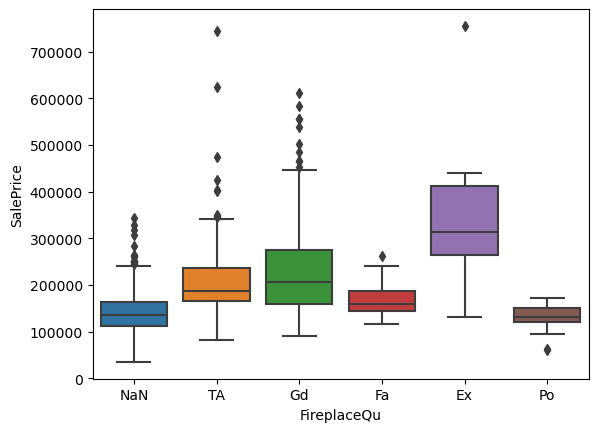

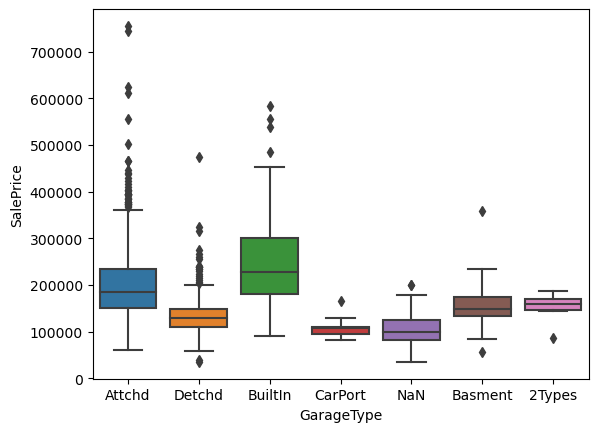

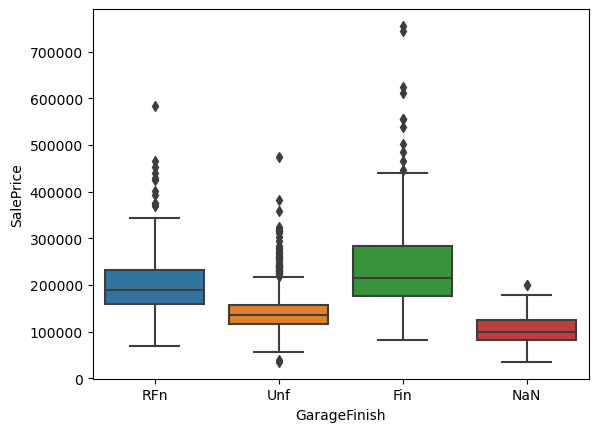

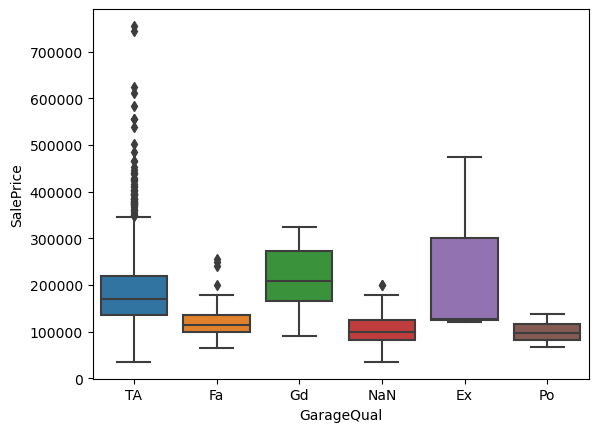

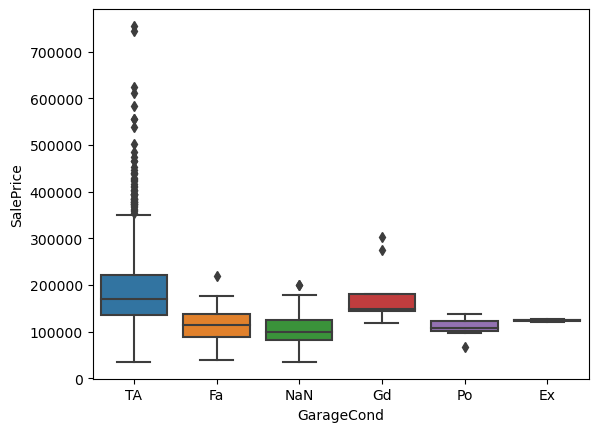

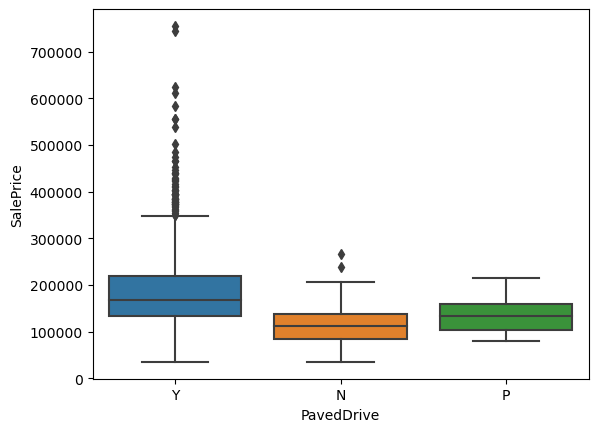

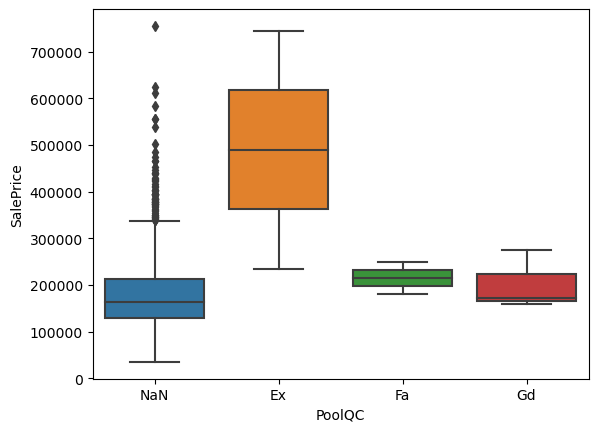

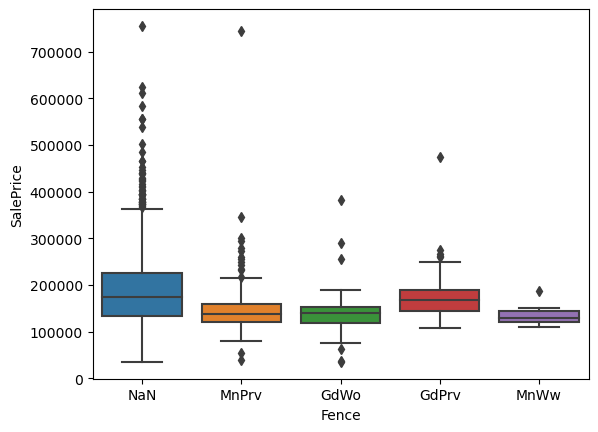

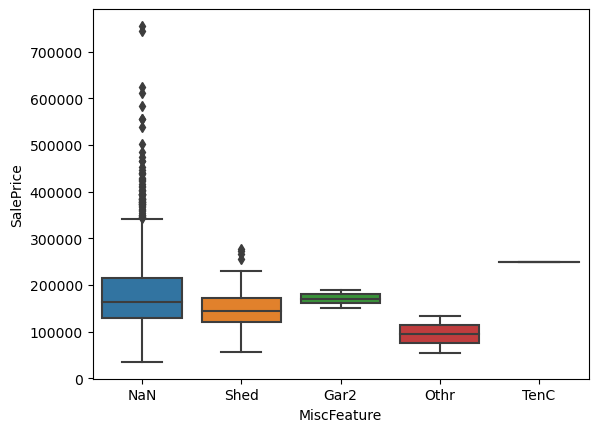

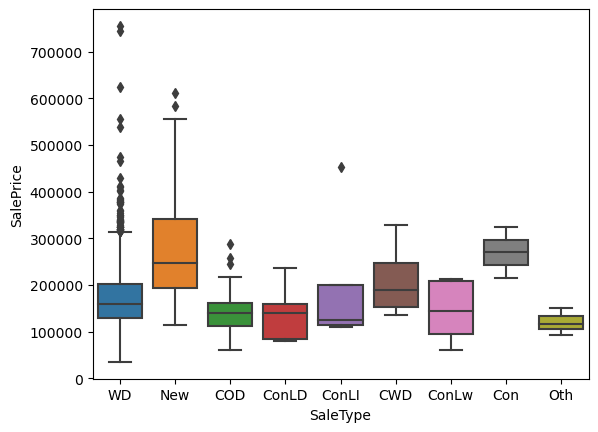

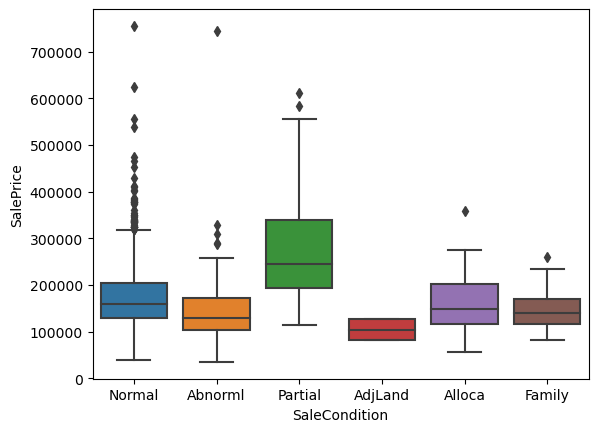

In [46]:
temp = df_raw.copy()
for var in df_raw.dtypes[df_raw.dtypes=='object'].index:
    # df_raw.groupby(var,dropna=False).agg({'SalePrice':'mean'}).plot.bar()
    temp[var]=temp[var].fillna('NaN')
    sns.boxplot(data=temp,x=var,y='SalePrice')
    plt.show()

In [44]:
temp = df_raw.copy()

In [45]:
temp['Alley']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: Alley, Length: 1460, dtype: object

## Scatterplot of Continuous vars

In [72]:
df_raw.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [78]:
df_raw.dtypes == 'int64'

Id                True
MSSubClass        True
MSZoning         False
LotFrontage      False
LotArea           True
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 81, dtype: bool

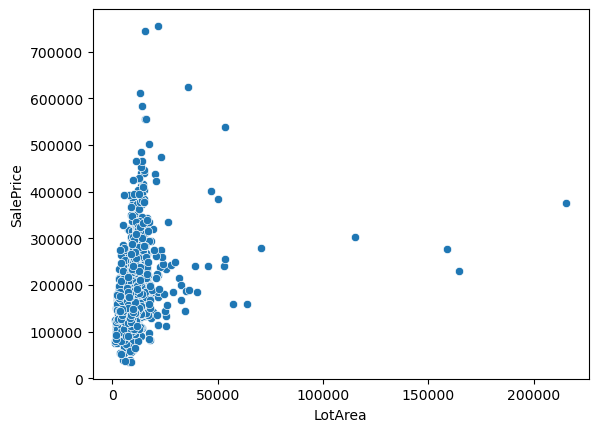

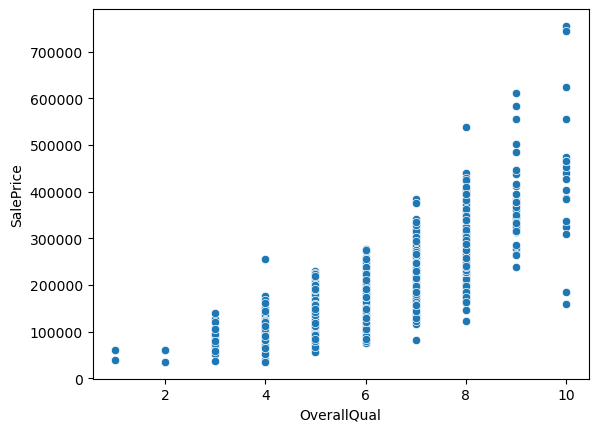

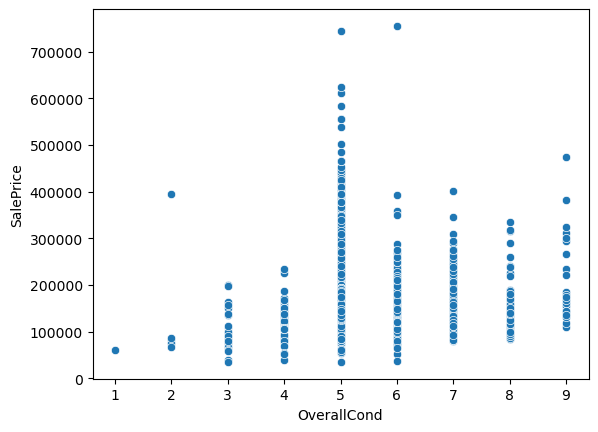

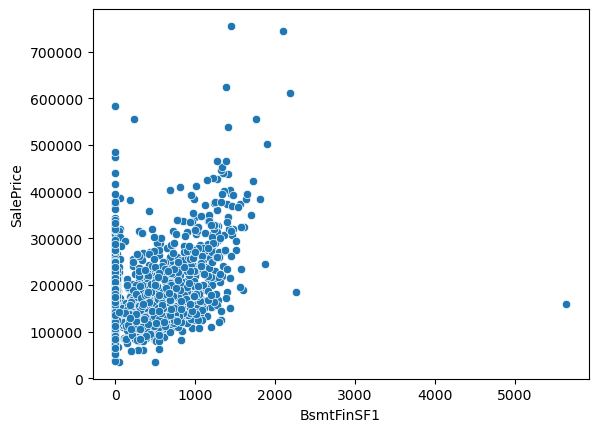

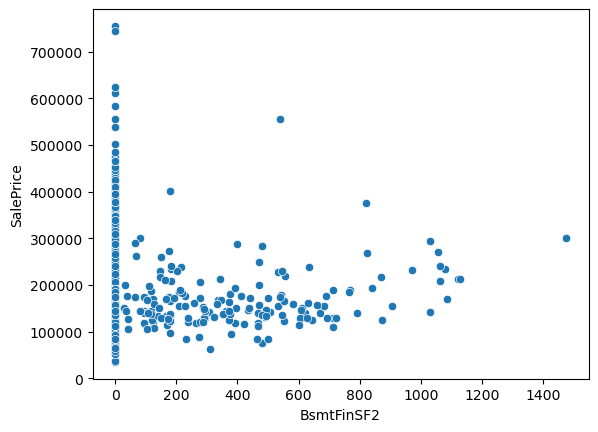

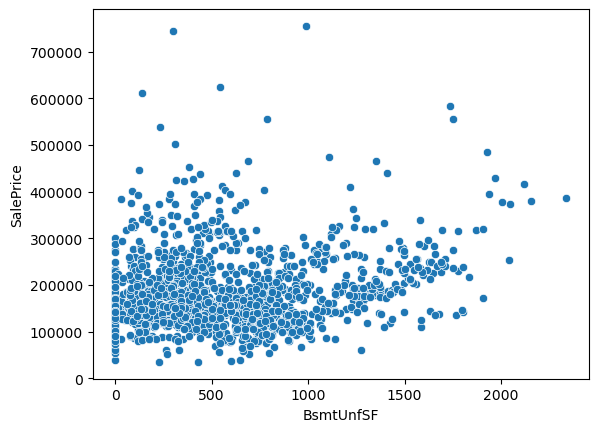

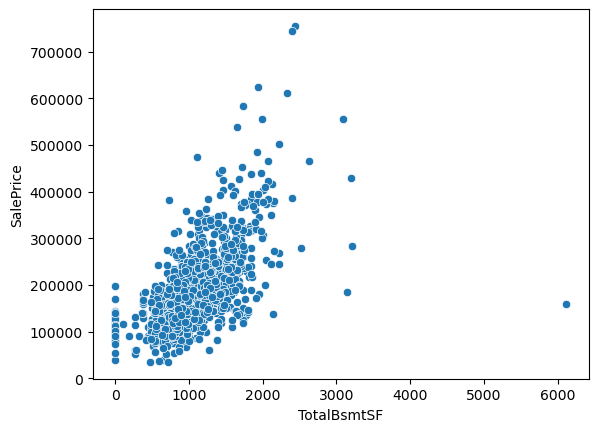

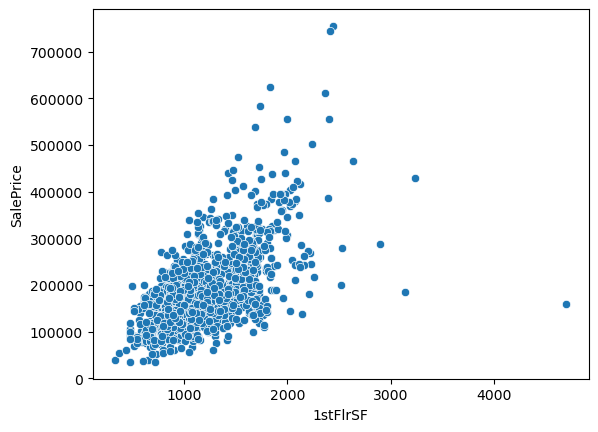

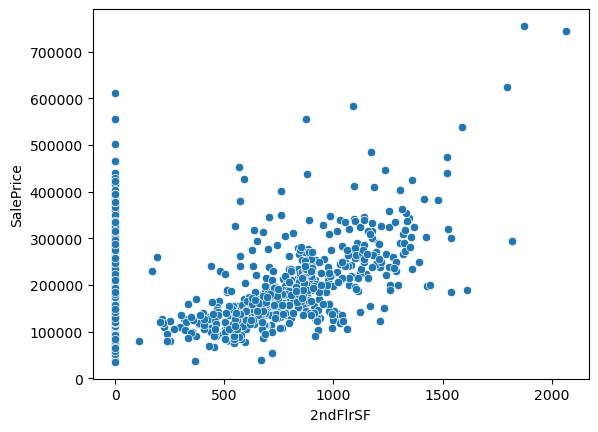

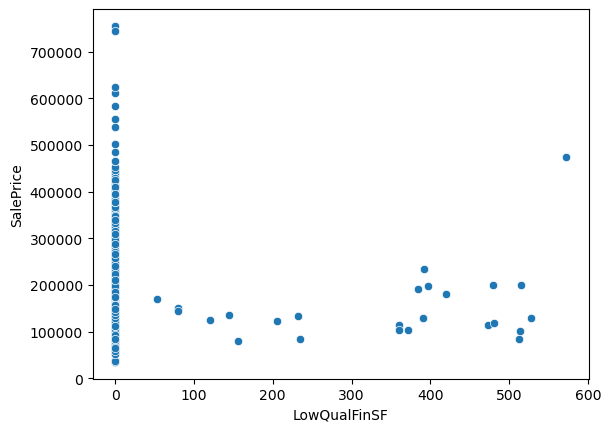

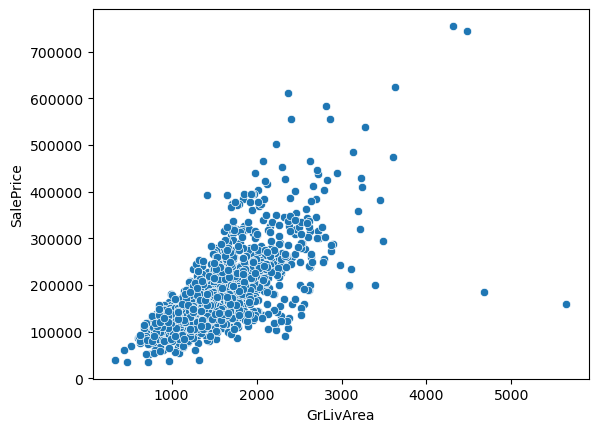

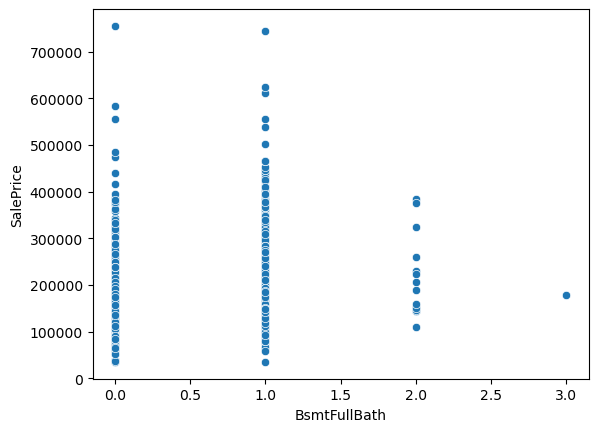

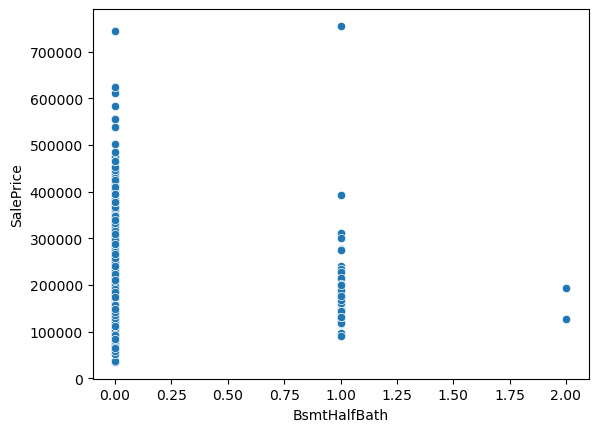

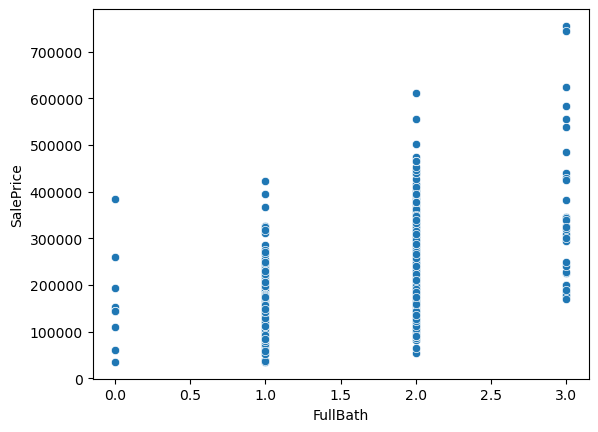

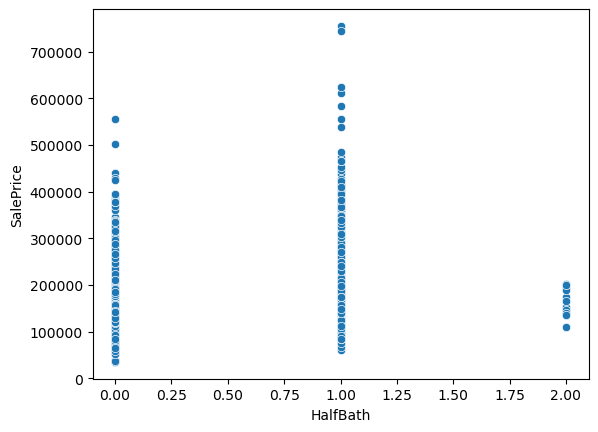

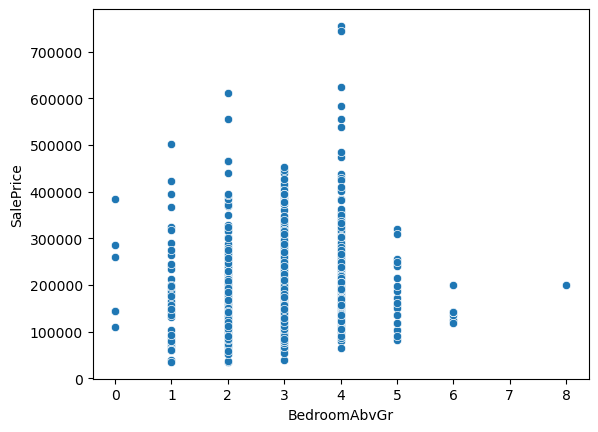

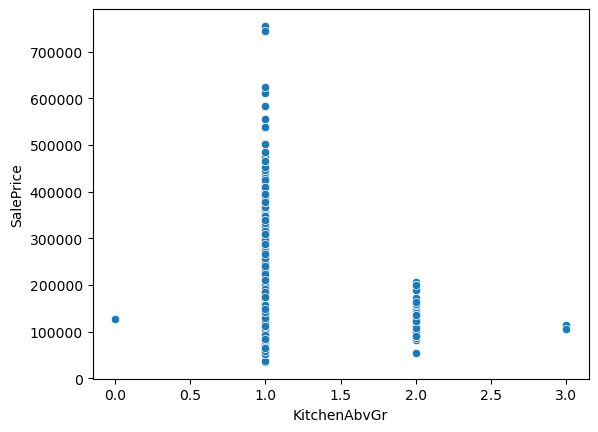

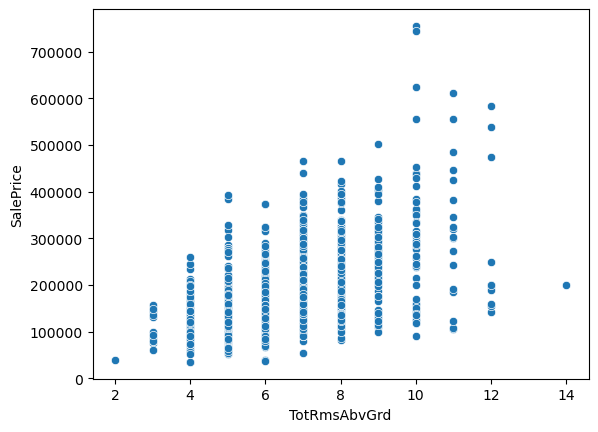

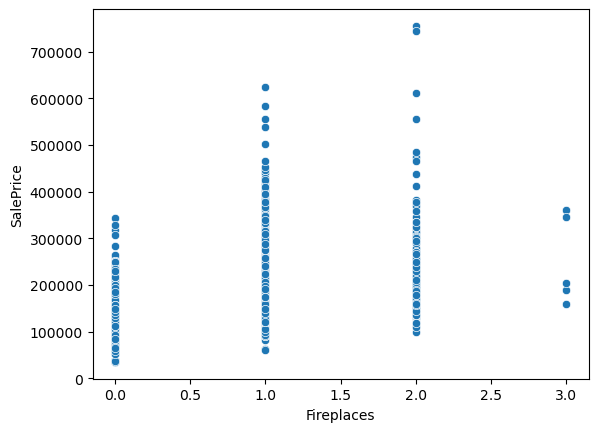

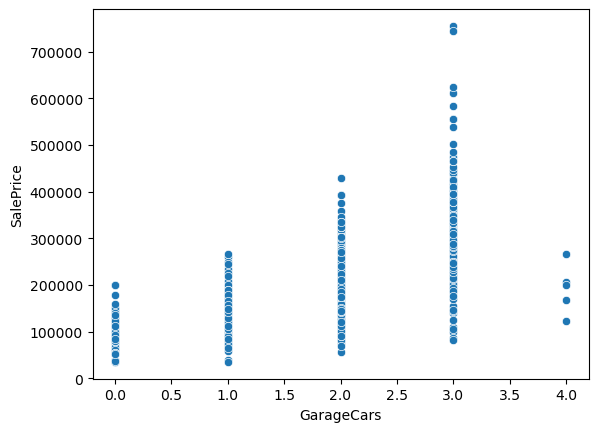

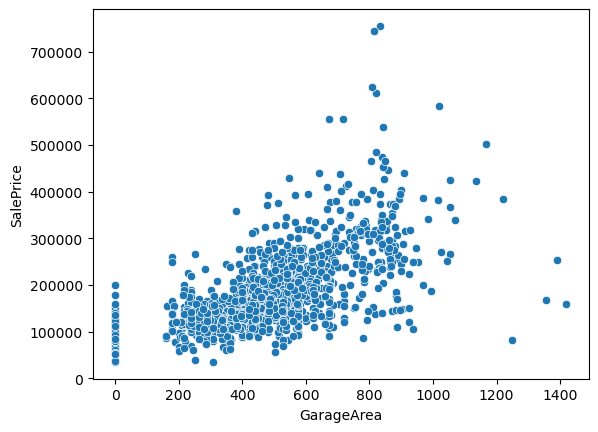

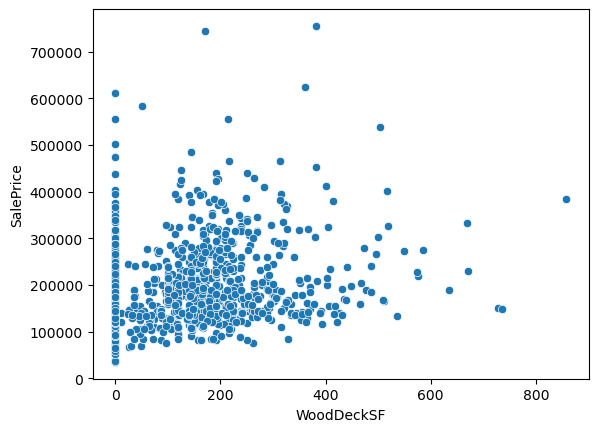

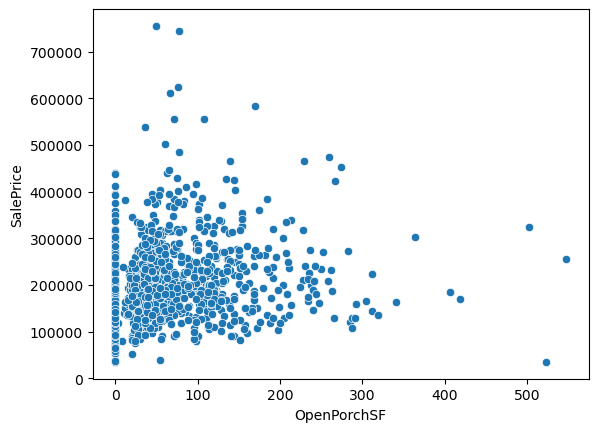

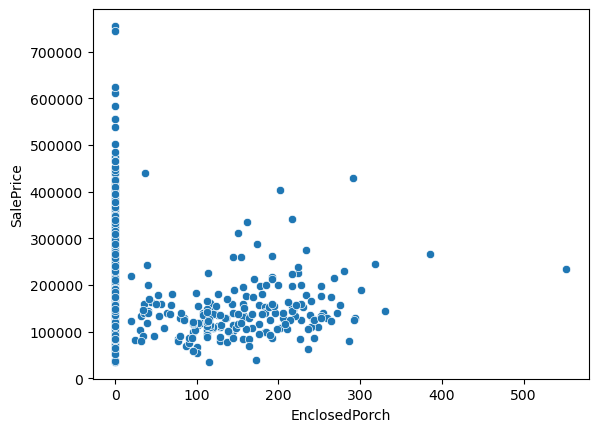

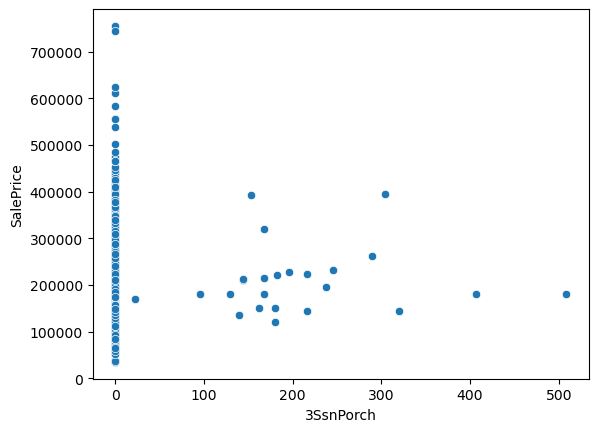

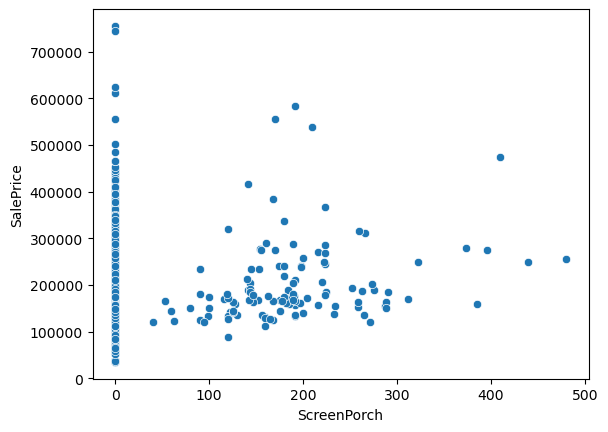

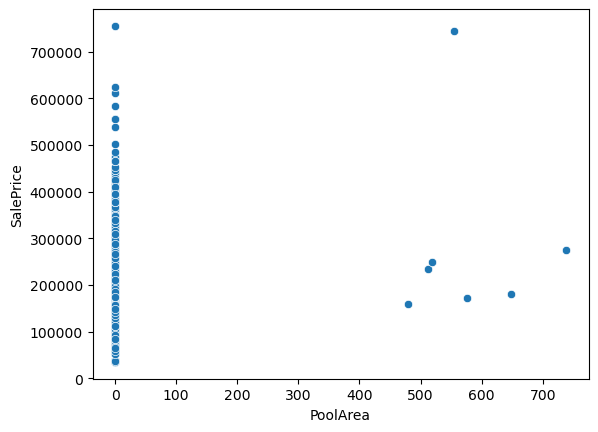

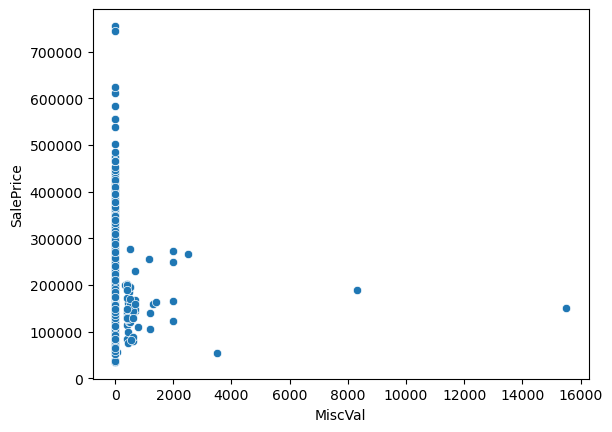

In [85]:
temp = df_raw.copy()
for var in df_raw.dtypes[df_raw.dtypes == 'int64'].index:
    if var in ['MSSubClass'
             ,'YearBuilt'
             ,'YearRemodAdd'
             ,'YrSold'         
             ,'MoSold'
              ,'GarageYrBlt'
              ,'Id'
              ,'SalePrice']:
        continue
    # df_raw.groupby(var,dropna=False).agg({'SalePrice':'mean'}).plot.bar()
    temp[var]=temp[var].fillna('NaN')
    sns.scatterplot(data=temp,x=var,y='SalePrice')
    plt.show()

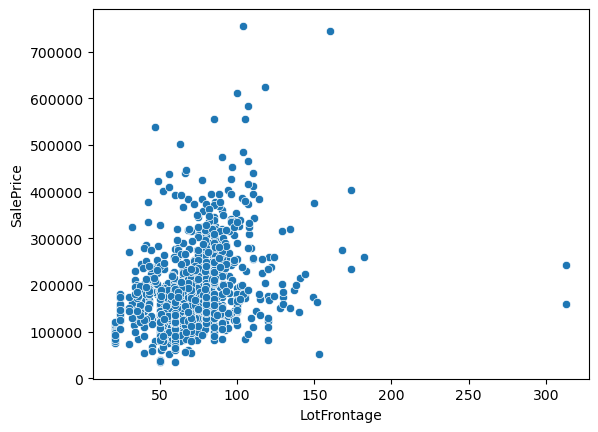

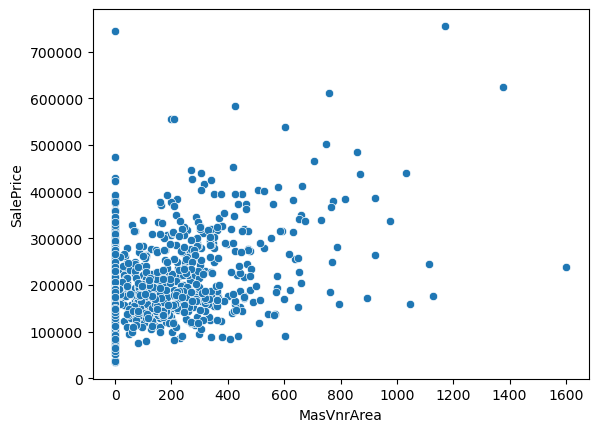

In [150]:
temp = df_raw.copy()
for var in df_raw.dtypes[df_raw.dtypes == 'float64'].index:
    if var in ['MSSubClass'
             ,'YearBuilt'
             ,'YearRemodAdd'
             ,'YrSold'         
             ,'MoSold'
              ,'GarageYrBlt'
              ,'Id'
              ,'SalePrice']:
        continue
    # df_raw.groupby(var,dropna=False).agg({'SalePrice':'mean'}).plot.bar()
    temp[var]=temp[var].fillna('NaN')
    sns.scatterplot(data=temp,x=var,y='SalePrice')
    plt.show()

## Heatmap Correlation

In [98]:
corr_df = df_raw.loc[:,~df_raw.columns.isin(['MSSubClass'
             ,'YearBuilt'
             ,'YearRemodAdd'
             ,'YrSold'         
             ,'MoSold'
              ,'GarageYrBlt'
              ,'Id'
              ,'SalePrice'])].corr()

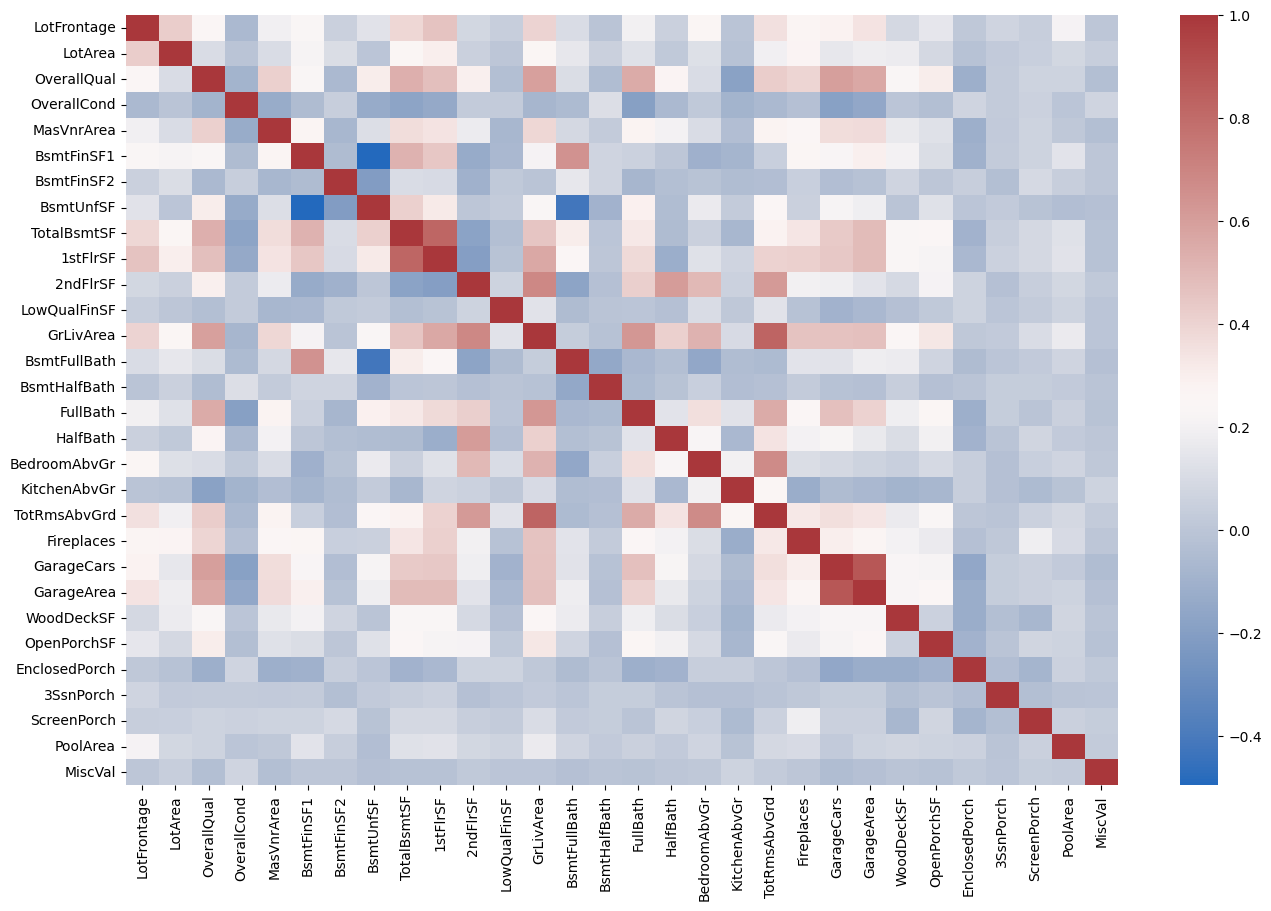

In [99]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_df,cmap=sns.color_palette('vlag', as_cmap=True))
plt.show()

## Data Transforms

In [262]:
df = df_raw.copy()

In [263]:
df['AgeHouseAtSale'] = df['YrSold'] - df['YearBuilt']

df['YearsLastRemodelAtSale']  = df['YrSold'] - df['YearRemodAdd']

df['YearsGarageBuiltAtSale'] = df['YrSold'] - df['GarageYrBlt'] 

df.drop(columns=['Id'],inplace=True)

df['MSSubClass'] = df['MSSubClass'].astype(str)

In [264]:
# for var in df.dtypes[df.dtypes=='object'].index:
#     # df_raw.groupby(var,dropna=False).agg({'SalePrice':'mean'}).plot.bar()
#     df[var]=df[var].fillna('NULL')

In [265]:
df[df.isnull().mean().sort_values(ascending=False)[:4].index].describe()

,PoolQC,MiscFeature,Alley,Fence
count,7,54,91,281
unique,3,4,2,4
top,Gd,Shed,Grvl,MnPrv
freq,3,49,50,157


In [287]:
for var in df.dtypes[df.dtypes == 'int64'].index:
    if df[var].isnull().sum()>0:
        df[var+'_isnull'] = df[var].isnull().astype(int)
        df[var]=df[var].fillna(df[var].mean())

for var in df.dtypes[df.dtypes == 'float64'].index:
    if df[var].isnull().sum()>0:
        df[var+'_isnull'] = df[var].isnull().astype(int)
        df[var]=df[var].fillna(df[var].mean())

df_dummies = pd.get_dummies(df,dummy_na=True,drop_first=False)

In [288]:
X = df_dummies.drop(columns='SalePrice')

In [289]:
y = df_dummies['SalePrice']

In [290]:
X['intercept'] = 1

In [291]:
model = sm.OLS(y,X)

In [292]:
results = model.fit_regularized(alpha=10,L1_wt=1)

In [293]:
pd.set_option('display.max_rows',100)
pd.DataFrame(results.params)[:100]

,0
LotFrontage,479.366781
LotArea,0.939111
OverallQual,21215.440292
OverallCond,3769.815805
YearBuilt,-6.144447
YearRemodAdd,-0.044138
MasVnrArea,27.586768
BsmtFinSF1,54.905391
BsmtFinSF2,41.808502
BsmtUnfSF,33.618078


## SKLEARN

In [235]:
from sklearn.linear_model import ElasticNetCV

In [294]:
# elastic_net_cv = ElasticNetCV(l1_ratio=[0,.5,1]
#                              ,alphas=[0.1,1,10,100]
#                              )
elastic_net_cv = ElasticNetCV(cv=5, random_state=0)

In [295]:
elastic_net_cv.fit(X=X,y=y)

ElasticNetCV(cv=5, random_state=0)

In [296]:
elastic_net_cv.alpha_

418135.5493659845

In [328]:
test = pd.DataFrame(elastic_net_cv.coef_,index=X.columns)

In [329]:
test.loc[test[0]>0]

,0
LotArea,0.741789
YearBuilt,2.634329
YearRemodAdd,1.412218
MasVnrArea,11.931478
BsmtFinSF1,17.480728
BsmtUnfSF,8.295841
TotalBsmtSF,25.697171
1stFlrSF,20.311542
2ndFlrSF,16.211874
GrLivArea,36.657818


# Prediction

In [324]:
df_predict_raw = pd.read_csv('test.csv')

In [325]:
df_predict = df_predict_raw.copy()

In [301]:
df_predict['AgeHouseAtSale'] = df_predict['YrSold'] - df_predict['YearBuilt']

df_predict['YearsLastRemodelAtSale']  = df_predict['YrSold'] - df_predict['YearRemodAdd']

df_predict['YearsGarageBuiltAtSale'] = df_predict['YrSold'] - df_predict['GarageYrBlt'] 

df_predict.drop(columns=['Id'],inplace=True)

df_predict['MSSubClass'] = df_predict['MSSubClass'].astype(str)

In [302]:
for var in df_predict.dtypes[df_predict.dtypes == 'int64'].index:
    if df_predict[var].isnull().sum()>0:
        df_predict[var+'_isnull'] = df_predict[var].isnull().astype(int)
        df_predict[var]=df_predict[var].fillna(df_predict[var].mean())

for var in df_predict.dtypes[df_predict.dtypes == 'float64'].index:
    if df_predict[var].isnull().sum()>0:
        df_predict[var+'_isnull'] = df_predict[var].isnull().astype(int)
        df_predict[var]=df_predict[var].fillna(df_predict[var].mean())

df_predict_dummies = pd.get_dummies(df_predict,dummy_na=True,drop_first=False)

In [303]:
_, df_predict_dummies = X.align(df_predict_dummies, axis=1, fill_value=0)

In [311]:
df_predict_dummies.drop(columns=df_predict_dummies.columns[~df_predict_dummies.columns.isin(X.columns)],inplace=True)

In [313]:
df_predict_dummies['intercept']=1

In [319]:
elastic_net_cv.predict(df_predict_dummies[X.columns])

array([145352.89775386, 173645.60627352, 187555.38189078, ...,
       188931.30465744, 134517.88095765, 210680.10015078])

In [326]:
df_predict_raw['SalePrice'] = elastic_net_cv.predict(df_predict_dummies[X.columns])

In [327]:
df_predict_raw[['Id','SalePrice']].to_csv('predictions.csv',index=False)